# Principal Component Analysis



* Edmon Abrahamyan
* Mane Piliposyan
* Mher Khachatryan

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

In [2]:
def pca_random_data():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)
    
    return X_blob, X_pca,S,  pca

def plot_original_data(X_blob, X_pca,S,  pca):
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))

    axes.set_title("Original data")
    axes.scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes.set_xlabel("feature 1")
    axes.set_ylabel("feature 2")
    axes.arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes.arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes.text(-1.5, -.5, "Component 2", size=14)
    axes.text(-4, -4, "Component 1", size=14)
    axes.set_aspect('equal')
    
    

def plot_transformed_data(X_pca):
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    axes.set_title("Transformed data")
    axes.scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0,
                    s=60, cmap='viridis')
    axes.set_xlabel("First principal component")
    axes.set_ylabel("Second principal component")
    axes.set_aspect('equal')
    axes.set_ylim(-8, 8)   

    
def transformed_component(X_pca):
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    axes.set_title("Transformed data w/ second component dropped")
    axes.scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
                    linewidths=0, s=60, cmap='viridis')
    axes.set_xlabel("First principal component")
    axes.set_aspect('equal')
    axes.set_ylim(-8, 8)
    
def plot_pca_back_rotate(X_blob):
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes.set_title("Back-rotation using only first component")
    axes.scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
                 linewidths=0, s=60, cmap='viridis')
    axes.set_xlabel("feature 1")
    axes.set_ylabel("feature 2")
    axes.set_aspect('equal')
    axes.set_xlim(-8, 4)
    axes.set_ylim(-8, 4)


In [3]:
X_blob, X_pca,S,  pca = pca_random_data()

# PCA Steps

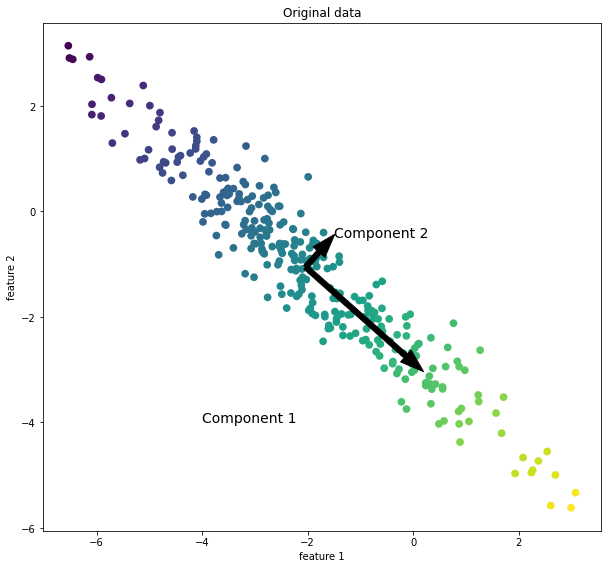

In [4]:
plot_original_data(X_blob, X_pca, S, pca)

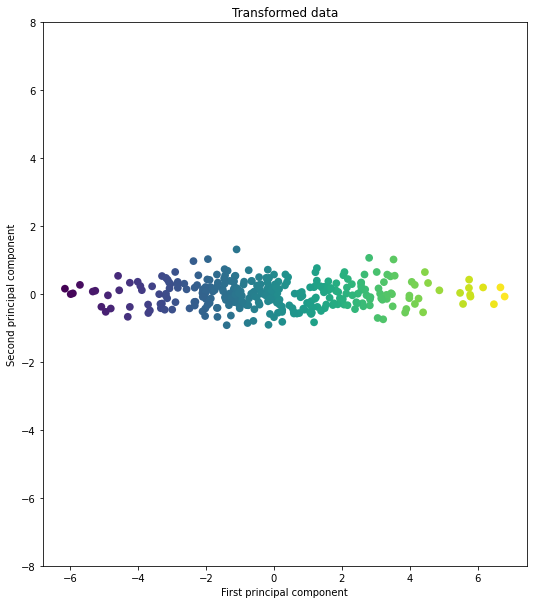

In [5]:
plot_transformed_data(X_pca)

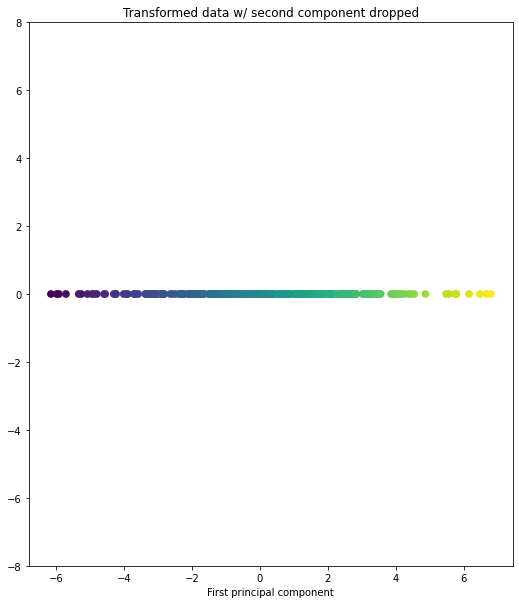

In [6]:
transformed_component(X_pca)

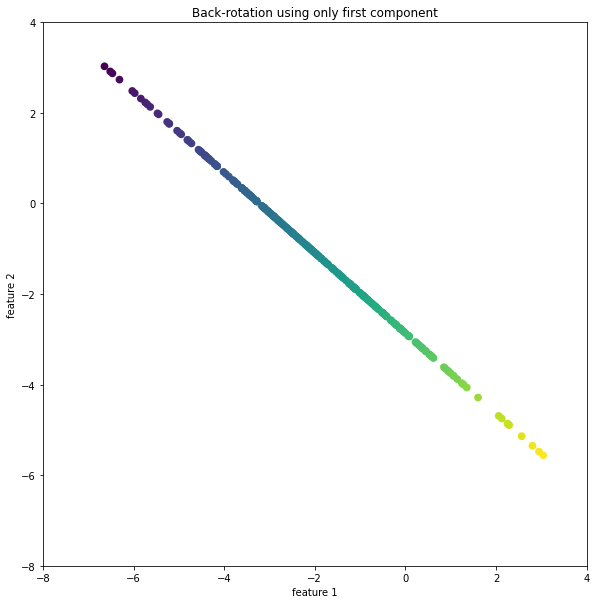

In [7]:
plot_pca_back_rotate(X_blob)

# PCA Applications

## Better Visualization

Example on breast cancer dataset

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

Plotting and understanding 30 features is hard

One way of doing so is to plot histograms for target labels

In [10]:
def plot_cancer():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    malignant = cancer.data[cancer.target == 0]
    benign = cancer.data[cancer.target == 1]
    ax = axes.ravel()
    for i in range(4):
        _, bins = np.histogram(cancer.data[:, i], bins=50)
        ax[i].hist(malignant[:, i], bins=bins, color="r", alpha=.5)
        ax[i].hist(benign[:, i], bins=bins, color="b", alpha=.5)
        ax[i].set_title(cancer.feature_names[i])
        ax[i].set_yticks(())
        ax[0].set_xlabel("Feature magnitude")
        ax[0].set_ylabel("Frequency")
        ax[0].legend(["malignant", "benign"], loc="best")
        fig.tight_layout()

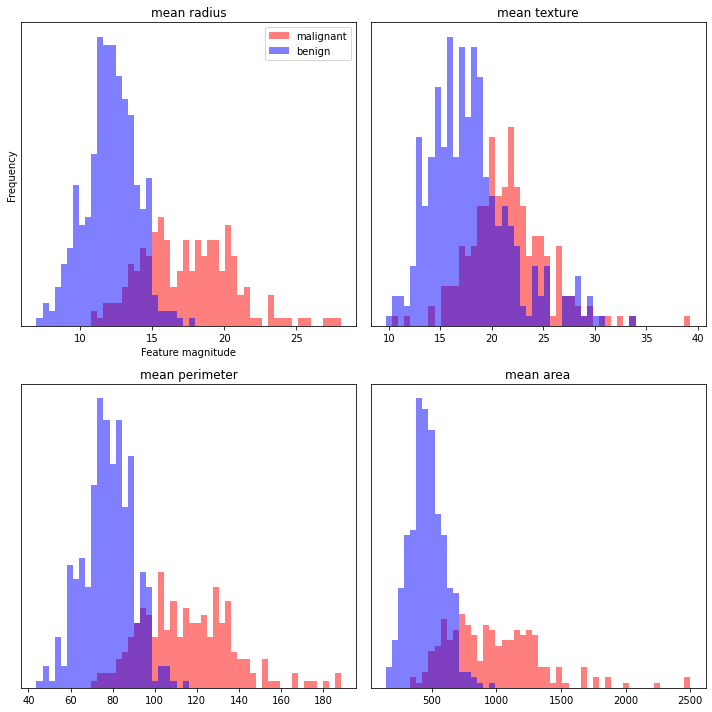

In [11]:
plot_cancer()

Scale to unit variance 

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Apply PCA

In [20]:
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [21]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines

Text(0, 0.5, 'Second principal component')

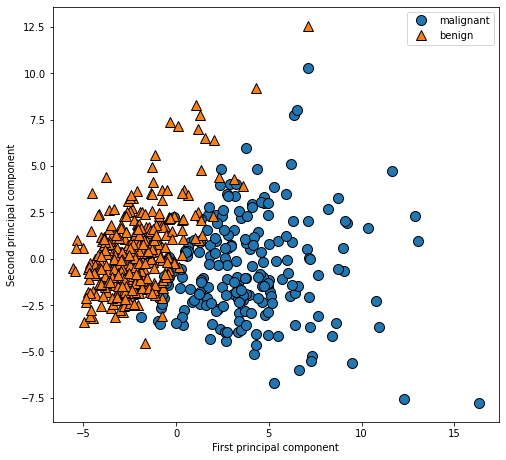

In [22]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0],  X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 3D PCA

In [23]:
pca = PCA(n_components=3)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 3)


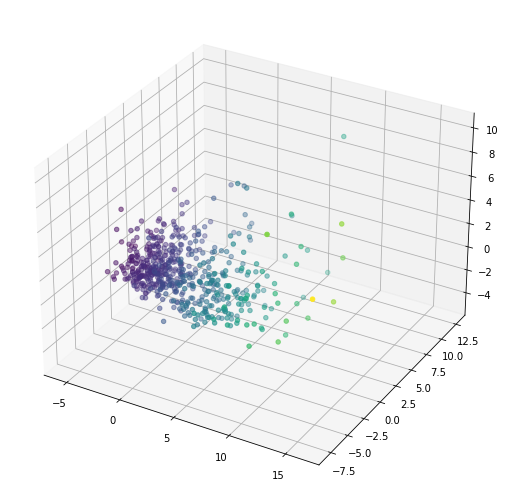

In [25]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=X_pca[:, 0]);

## Feature Extraction

### Eigenfaces

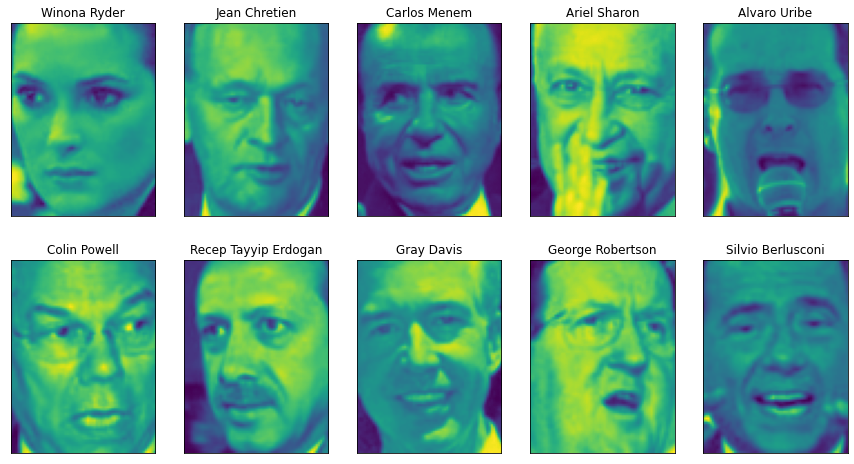

In [26]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [28]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [32]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_people)
X_pca = pca.transform(X_people)
print("X_train_pca.shape: {}".format(X_pca.shape))

X_train_pca.shape: (2063, 100)


Components of PCA of faces

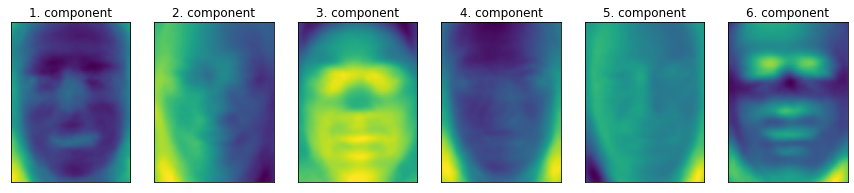

In [34]:
fix, axes = plt.subplots(1, 6, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_[:6], axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

Recunstracting faces

$Face \approx X_{0} * component_{0} + X_{1} + component_{1} + ... + X_{n}* component_{n} $

In [36]:
def pca_faces(X):
    reduced_images = []
    for n_components in [10, 50, 100, 500]:
        pca = PCA(n_components=n_components)
        pca.fit(X)
        X_pca= pca.transform(X)

        X_back = pca.inverse_transform(X_pca)
        reduced_images.append(X_back)
    return reduced_images

In [37]:
def plot_pca_faces(X, image_shape):
    reduced_images = pca_faces(X)

    # plot the first three images in the test set:
    fix, axes = plt.subplots(2, 5, figsize=(15, 12),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes):
        # plot original image
        ax[0].imshow(X[i].reshape(image_shape),
                     vmin=0, vmax=1)
        # plot the four back-transformed images
        for a, X_back in zip(ax[1:], reduced_images):
            a.imshow(X_back[i].reshape(image_shape), vmin=0, vmax=1)

    # label the top row
    axes[0, 0].set_title("original image")
    for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
        ax.set_title("%d components" % n_components)

This also can be compression technique

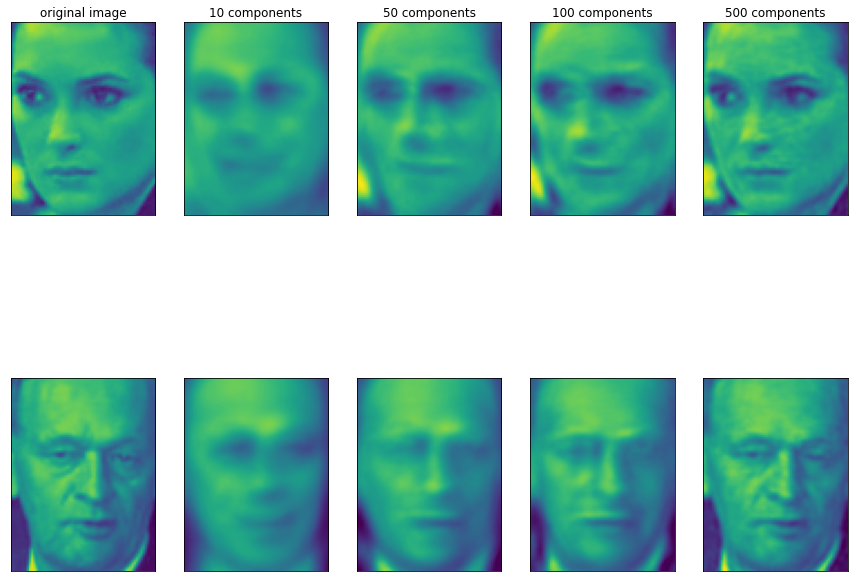

In [39]:
plot_pca_faces(X_people, image_shape)

## Thank you 